In [31]:
import sys
import os.path
import cv2
import numpy as np

In [32]:
#read a csv file and turn it into a a dictionary, where the first column is the key and the second column is the value:
def read_csv(filename):
    with open(filename) as f:
        lines = f.readlines()
    return {line.split(';')[0]:line.split(';')[1].strip() for line in lines}



In [33]:
index_R = read_csv('datos_R/descriptores.csv')
i=3
print(list(index_R.keys())[i])
print(list(index_R.values())[i])


dataset_tarea1/dataset_a/r/r0519.jpg
[0.03078554, 0.013032045, 0.0047829514, 0.0, 0.053438153, 0.0, 0.0, 0.0, 0.028416354, 0.116646044, 0.016782194, 0.018457068, 0.0, 0.3576707, 0.0, 0.10828015, 0.2122492, 0.12829153, 0.3576707, 0.18244746, 0.15941648, 0.038971536, 0.3576707, 0.26604065, 0.15454186, 0.21948834, 0.3576707, 0.09614561, 0.021655591, 0.030587904, 0.0, 0.28193423, 0.10602373, 0.0889037, 0.13123874, 0.2507758, 0.0983735, 0.008430252, 0.0129007995, 0.041071672, 0.24572454, 0.021866713, 0.07533932, 0.07806746, 0.13458514, 0.301163, 0.03444236, 0.03707491, 0.09052068, 0.3690123, 0.05534645, 0.10591386, 0.07560341, 0.3690123, 0.081234604, 0.01020428, 0.015334637, 0.016269434, 0.19750226, 0.034404714, 0.024697306, 0.033795673, 0.11001343, 0.3690123, 0.052105427, 0.06544775, 0.045125786, 0.3690123, 0.12241432, 0.062792584, 0.04955904, 0.3690123, 0.15640903, 0.01986055, 0.02041003, 0.025908487, 0.29393938, 0.026518414, 0.020476224, 0.011147301, 0.19117182, 0.19515227, 0.016947381, 

In [34]:
def HOG(imagen):
    win_size = (64, 128)  # Tamaño de la ventana de detección en píxeles (ancho, alto)
    block_size = (16, 16)  # Tamaño de un bloque en píxeles (ancho, alto)
    block_stride = (8, 8)  # Desplazamiento de los bloques en píxeles (ancho, alto)
    cell_size = (8, 8)  # Tamaño de una celda en píxeles (ancho, alto)
    nbins = 9  # Número de bins (divisiones) en el histograma de gradientes

    img = cv2.imread(imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 128))
    hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, nbins)
    descriptor = hog.compute(img)

    return descriptor

In [35]:
# una funcion que recibe una imagen, calcula su descriptor HOG y lo compara con los descriptores de la base de datos index_R:

def buscar(imagen):

    descriptor = HOG(imagen)

    # comparar el descriptor de la imagen con los descriptores de la base de datos:
    distancias = []
    for key in index_R.keys():
        d = np.linalg.norm(descriptor - np.array(index_R[key][1:-1].split(','), dtype=np.float32))
        distancias.append(d)

    return distancias




In [36]:
# crea una lista de imagenes jpg desde una carpeta y sus subcarpetas, solo cuando el nombre de la imagen comienza con 'q':
def get_imagenes(carpeta):
    imagenes = []
    for root, dirs, files in os.walk(carpeta):
        for file in files:
            if file.endswith('.jpg') and file.startswith('q'):
                imagenes.append(os.path.join(root, file))
    return imagenes

imagenes_query = get_imagenes('dataset_tarea1')

dataset_tarea1/dataset_d/q/q0877.jpg


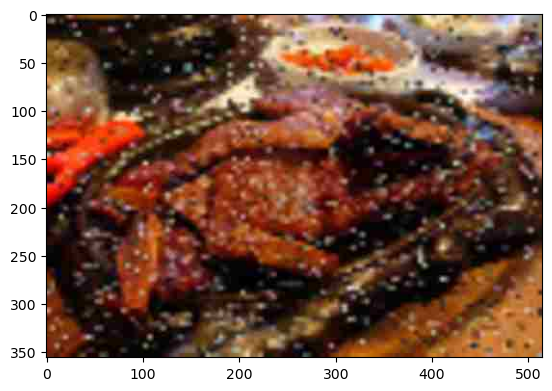

dataset_tarea1/dataset_d/r/r1039.jpg


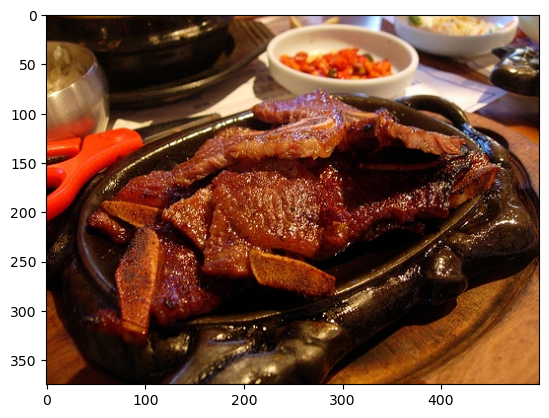

dataset_tarea1/dataset_b/r/r1562.jpg


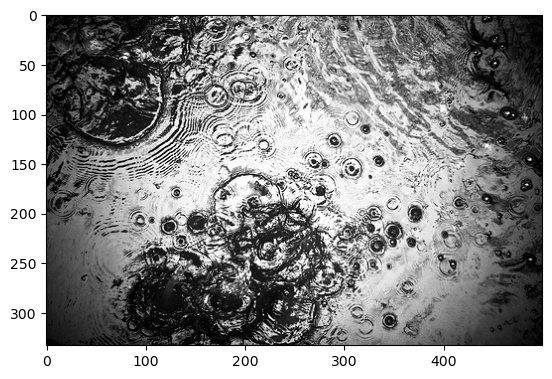

dataset_tarea1/dataset_a/r/r0053.jpg


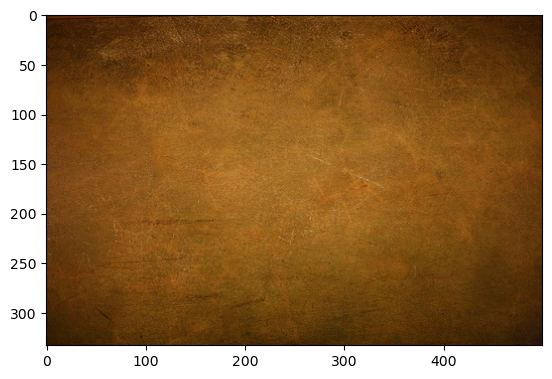

dataset_tarea1/dataset_f/r/r1861.jpg


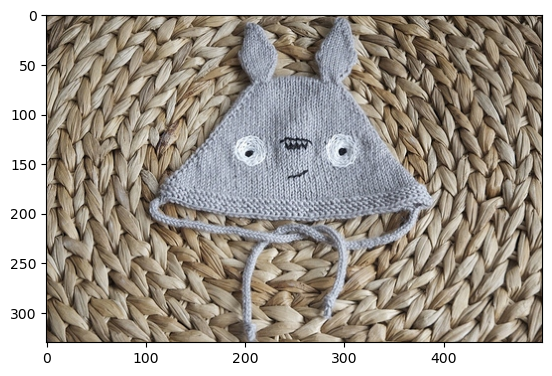

dataset_tarea1/dataset_e/r/r1581.jpg


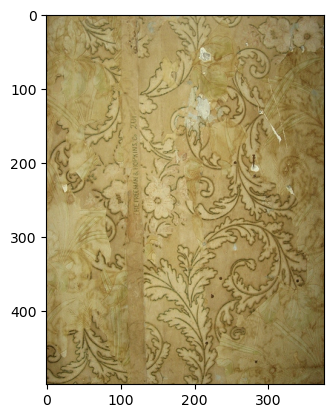

In [50]:
#pick a random image from the query set:
import random
imagen_query = random.choice(imagenes_query)

print(imagen_query)

#plotear la imagen query:
import matplotlib.pyplot as plt
img = cv2.imread(imagen_query)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


#____________________________________________________________________________

#obtener el nombre de las 5 imagenes mas parecidas:
distancias = buscar(imagen_query)
distancias = np.array(distancias)
indices = np.argsort(distancias)

#plotear las N imagenes mas parecidas:
N=5 
for i in range(N):
    print(list(index_R.keys())[indices[i]])
    img = cv2.imread(list(index_R.keys())[indices[i]])
    #img = cv2.resize(img, (64, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()




### Proximos pasos:

1. Calcular metrica acurray desde con archicos ground truth (gt.txt)